In [1]:
using PyPlot

# http://lib.stat.cmu.edu/datasets/boston
# predicting the median value of owner-occupied homes in $1000's

include("real_experiments_boston.jl")

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = import_sklearn() at Skcore.jl:120
└ @ ScikitLearn.Skcore C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:120


sigma is 

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:158


2.0
k is 3
num samples 506
[0.203851, 0.621588, 0.0739813, 0.0398239, 0.0, 0.0, 0.0, 0.0411647, 0.00507923, 0.0, 0.0, 0.0, 0.014512]
num leaves merging 16
mse merging 5.463571540866036
mse cart 8.614575907617981
time merging 0.081614899
time cart 0.003199622


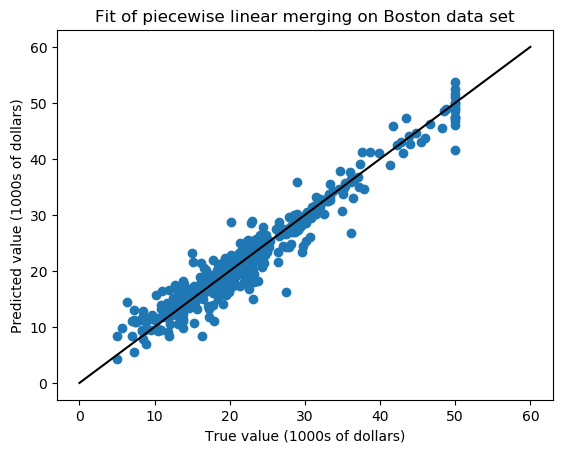

In [2]:
plt.scatter(y, yhat_merging) 
plt.plot([0,60],[0,60],"black")
xlabel("True value (1000s of dollars)")
ylabel("Predicted value (1000s of dollars)")
title("Fit of piecewise linear merging on Boston data set")
plt.show()

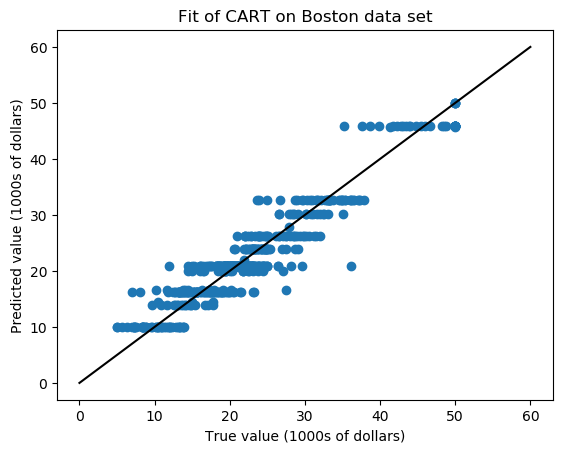

In [3]:
plt.scatter(y, yhat_cart) 
plt.plot([0,60],[0,60],"black")
xlabel("True value (1000s of dollars)")
ylabel("Predicted value (1000s of dollars)")
title("Fit of CART on Boston data set")
plt.show()

In [4]:
@sk_import metrics: r2_score
println(r2_score(y,yhat_merging))
println(r2_score(y, yhat_cart))


0.9352807360090934
0.8979552096710612


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = import_sklearn() at Skcore.jl:120
└ @ ScikitLearn.Skcore C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:120
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:158


In [5]:
mses

Dict{String,Array{Float64,2}} with 2 entries:
  "merging" => [11.7129 7.41002 … 3.90143 1.97972; 11.7129 7.41002 … 3.90143 1.…
  "cart"    => [15.6223 9.92245 … 6.77989 4.6949; 15.6223 9.92245 … 6.77989 4.6…

In [6]:
algo_colors = Dict([("cart", "blue"), ("merging", "orange")])

Dict{String,String} with 2 entries:
  "merging" => "orange"
  "cart"    => "blue"

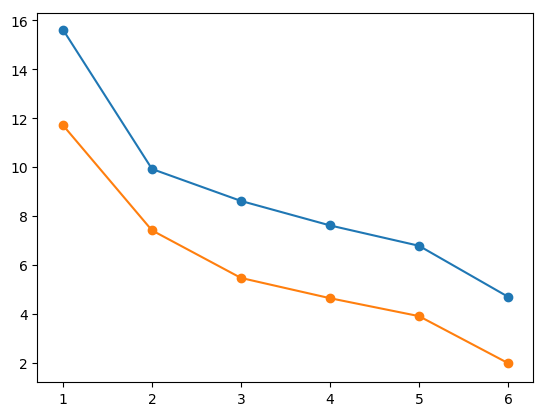

In [7]:
sigma_index = 2
plt.scatter(k_vals,mses["cart"][sigma_index ,:])
plt.plot(k_vals, mses["cart"][sigma_index ,:])
plt.scatter(k_vals,mses["merging"][sigma_index ,:])
plt.plot(k_vals, mses["merging"][sigma_index ,:])
plt.show()

#plot(n_vals, 200.0 ./ n_vals, label="C/n")
#plot(n_vals, 5.0 ./ sqrt(n_vals), label="C/sqrt(n)", color="olive")
#title("MSE with k=16 piecewise in 2-dimensions")
#yscale("log")
#xscale("log")
#xlabel("n")
#ylabel("MSE")
#legend(bbox_to_anchor=(1.05, .7), loc=2, borderaxespad=0.)
#plt.scatter(y, yhat_merging) 
#plt.show()

In [8]:
mses["cart"]

6×6 Array{Float64,2}:
 15.6223  9.92245  8.61458  6.77989  6.77989  4.6949 
 15.6223  9.92245  8.61458  7.61305  6.77989  4.6949 
 15.6223  9.92245  8.61458  7.61305  6.15469  5.23488
 15.6223  8.61458  7.61305  4.94849  4.81165  4.34882
 15.6223  9.40527  7.61305  5.23488  4.57979  4.46376
 15.6223  9.40527  7.61305  5.23488  4.57979  4.34882

In [9]:
mses["merging"]

6×6 Array{Float64,2}:
 11.7129   7.41002   5.46357  3.90143  3.90143  1.97972
 11.7129   7.41002   5.46357  4.63519  3.90143  1.97972
 11.7129   7.41002   5.46357  4.63519  3.17531  2.93828
 11.7129   8.6051    6.65865  6.16281  6.16281  5.90092
 11.7129  10.902    10.7999   8.45969  8.35763  8.1978 
 11.7129  10.902    10.7999   8.45969  8.35763  8.35763